Trying to assess the wildfire

In [1]:
import geopandas as gpd

# Read the three shapefiles
outlets = gpd.read_file('exports/outlets.shp')
segments = gpd.read_file('exports/segments.shp')
basins = gpd.read_file('exports/basins.shp')

print("OUTLETS SHAPEFILE:")
print(f"Number of features: {len(outlets)}")
print(f"Columns: {list(outlets.columns)}")
print()

print("SEGMENTS SHAPEFILE:")
print(f"Number of features: {len(segments)}")
print(f"Columns: {list(segments.columns)}")
print()

print("BASINS SHAPEFILE:")
print(f"Number of features: {len(basins)}")
print(f"Columns: {list(basins.columns)}")
print()

# Show first few rows of segments (most important for debris flow data)
print("FIRST 3 ROWS OF SEGMENTS:")
print(segments.head(3))

OUTLETS SHAPEFILE:
Number of features: 51
Columns: ['FID', 'geometry']

SEGMENTS SHAPEFILE:
Number of features: 383
Columns: ['Segment_ID', 'H_16mmh', 'P_16mmh', 'V_16mmh', 'Vmin_16_95', 'Vmax_16_95', 'H_20mmh', 'P_20mmh', 'V_20mmh', 'Vmin_20_95', 'Vmax_20_95', 'H_24mmh', 'P_24mmh', 'V_24mmh', 'Vmin_24_95', 'Vmax_24_95', 'H_40mmh', 'P_40mmh', 'V_40mmh', 'Vmin_40_95', 'Vmax_40_95', 'I15_50', 'R15_50', 'I15_75', 'R15_75', 'I30_50', 'R30_50', 'I30_75', 'R30_75', 'I60_50', 'R60_50', 'I60_75', 'R60_75', 'Terrain_M1', 'Fire_M1', 'Soil_M1', 'Bmh_km2', 'Relief_m', 'Area_km2', 'ExtRatio', 'BurnRatio', 'Slope', 'ConfAngle', 'DevAreaKm2', 'geometry']

BASINS SHAPEFILE:
Number of features: 51
Columns: ['Segment_ID', 'H_16mmh', 'P_16mmh', 'V_16mmh', 'Vmin_16_95', 'Vmax_16_95', 'H_20mmh', 'P_20mmh', 'V_20mmh', 'Vmin_20_95', 'Vmax_20_95', 'H_24mmh', 'P_24mmh', 'V_24mmh', 'Vmin_24_95', 'Vmax_24_95', 'H_40mmh', 'P_40mmh', 'V_40mmh', 'Vmin_40_95', 'Vmax_40_95', 'I15_50', 'R15_50', 'I15_75', 'R15_75', 'I

Trying the reclassification of USGS

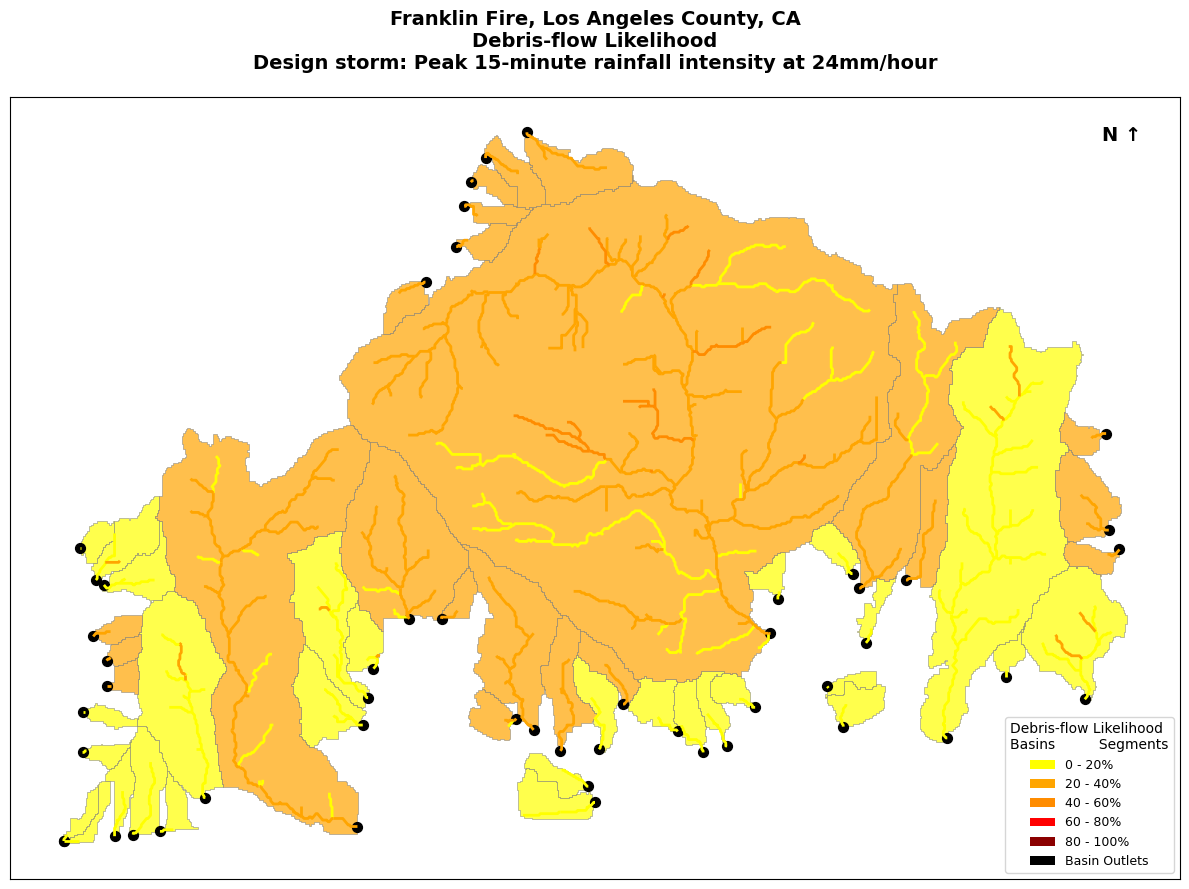

DEBRIS FLOW LIKELIHOOD SUMMARY (24 mm/hr):

BASINS:
likelihood_class
0 - 20%     29
20 - 40%    22
Name: count, dtype: int64

SEGMENTS:
likelihood_class
0 - 20%     154
20 - 40%    207
40 - 60%     22
Name: count, dtype: int64

Total Outlets: 51


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Read the shapefiles
outlets = gpd.read_file('exports/outlets.shp')
segments = gpd.read_file('exports/segments.shp')
basins = gpd.read_file('exports/basins.shp')

# Define USGS standard debris flow likelihood classification
def classify_probability(prob):
    if prob <= 0.2:
        return '0 - 20%'
    elif prob <= 0.4:
        return '20 - 40%'
    elif prob <= 0.6:
        return '40 - 60%'
    elif prob <= 0.8:
        return '60 - 80%'
    else:
        return '80 - 100%'

# Add classification columns for 24 mm/hr
basins['likelihood_class'] = basins['P_24mmh'].apply(classify_probability)
segments['likelihood_class'] = segments['P_24mmh'].apply(classify_probability)

# Define colors matching USGS style
colors = {
    '0 - 20%': '#FFFF00',      # Yellow
    '20 - 40%': '#FFA500',     # Orange  
    '40 - 60%': '#FF8C00',     # Dark Orange
    '60 - 80%': '#FF0000',     # Red
    '80 - 100%': '#8B0000'     # Dark Red
}

# Create the map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot basins (catchments) with colors
for category in colors.keys():
    basin_subset = basins[basins['likelihood_class'] == category]
    if not basin_subset.empty:
        basin_subset.plot(ax=ax, color=colors[category], alpha=0.7, 
                         edgecolor='gray', linewidth=0.5)

# Plot segments (stream channels) with colors
for category in colors.keys():
    segment_subset = segments[segments['likelihood_class'] == category]
    if not segment_subset.empty:
        segment_subset.plot(ax=ax, color=colors[category], linewidth=2)

# Plot outlets as black dots
outlets.plot(ax=ax, color='black', markersize=50, marker='o')

# Create legend
legend_elements = [Patch(facecolor=colors[cat], label=cat) for cat in colors.keys()]
legend_elements.append(Patch(facecolor='black', label='Basin Outlets'))

ax.legend(handles=legend_elements, loc='lower right', 
          title='Debris-flow Likelihood\nBasins          Segments', 
          title_fontsize=10, fontsize=9)

# Set title and labels
ax.set_title('Franklin Fire, Los Angeles County, CA\nDebris-flow Likelihood\nDesign storm: Peak 15-minute rainfall intensity at 24mm/hour', 
             fontsize=14, fontweight='bold', pad=20)

# Remove axis ticks but keep frame
ax.set_xticks([])
ax.set_yticks([])

# Add north arrow
ax.text(0.95, 0.95, 'N ↑', transform=ax.transAxes, fontsize=14, 
        fontweight='bold', ha='center', va='center')

plt.tight_layout()
plt.show()

# Print summary statistics
print("DEBRIS FLOW LIKELIHOOD SUMMARY (24 mm/hr):")
print("\nBASINS:")
print(basins['likelihood_class'].value_counts().sort_index())
print(f"\nSEGMENTS:")  
print(segments['likelihood_class'].value_counts().sort_index())
print(f"\nTotal Outlets: {len(outlets)}")